1. Install and Import Dependencies

In [4]:
//%pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

SyntaxError: invalid syntax (632483128.py, line 1)

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [8]:
!cd yolov5
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
You should consider upgrading via the 'c:\Users\a7568\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


2. Load Model

In [16]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.classes = [67]

Using cache found in C:\Users\a7568/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-18 Python-3.9.10 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11264MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


3. Make Detections

In [26]:
img = "C:\\Users\\a7568\\Desktop\\UW\\Project\\GoogleDrive\\training_set\\img_1.jpg"
results = model(img)
results.print()

image 1/1: 1080x1920 1 cell phone
Speed: 12.0ms pre-process, 144.1ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


[tensor([[501.81042, 157.34424, 869.38074, 874.98254,   0.88601,  67.00000]], device='cuda:0')]

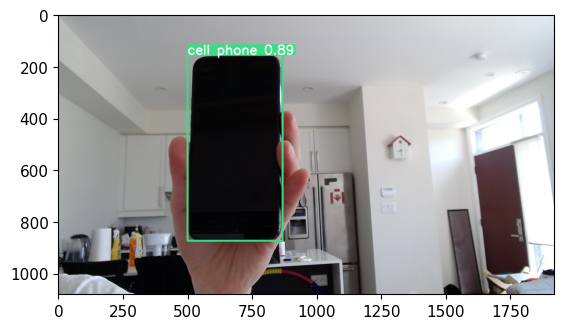

In [21]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

4. Real Time Detections

In [22]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # Make detections
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

5. Get center point from picture

In [41]:
img = "C:\\Users\\a7568\\Desktop\\UW\\Project\\GoogleDrive\\training_set\\img_1.jpg"
results = model(img)
x_midpoint = int(results.xyxy[0][0][0]+results.xyxy[0][0][2])
y_midpoint = int(results.xyxy[0][0][1]+results.xyxy[0][0][3])
center = [x_midpoint, y_midpoint]
print(center)

[1371, 1032]
